In [1]:
%matplotlib inline
import numpy as np 
import math
import matplotlib.pyplot as plt

In [4]:
def sort_vertices(pts):
    xpts = pts[:, 0]
    ypts = pts[:, 1]
    xc = np.sum(xpts) / len(xpts)
    yc = np.sum(ypts) / len(ypts)
    theta = np.arctan2(ypts - yc, xpts - xc) * 180 / np.pi
    indices = np.argsort(theta)
    return pts[indices]

def show(obj, newObj = None):
    plt.figure(figsize=(5, 5))
    if obj is not None:
        sorted_obj = sort_vertices(obj[:, :2])
#         print(sorted_obj)
        plt.fill(sorted_obj[:, 0], sorted_obj[:, 1], fc="blue", alpha=0.5, label="Original Object")
    if newObj is not None:
        sorted_newObj = sort_vertices(newObj[:, :2])
        plt.fill(sorted_newObj[:, 0], sorted_newObj[:, 1], fc="orange", alpha=0.5, label="Transformed Object")
    plt.legend()
    plt.axis('equal')
    plt.title('2D Transformations')
    plt.show()

def getNewObj():
    n = np.random.randint(3, 10) 
    return np.c_[np.random.randint(1, 100, (n, 2)), np.ones((n, 1))]

def translation(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dx = int(input("Enter translation factor along x-axis: "))
    dy = int(input("Enter translation factor along y-axis: "))
    T = np.eye(3)
    T[2, :-1] = dx, dy
    return obj @ T

def scaling(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dx = int(input("Enter scaling factor along x-axis: "))
    dy = int(input("Enter scaling factor along y-axis: "))
    T = np.diag((dx, dy, 1.0))
    return obj @ T

def rotation(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dir = int(input("1.Clockwise\n2.Anti-clockwise\nDirection of rotation: "))
    if dir not in [1, 2]:
        raise Exception("Enter a valid choice!!")
    deg = int(input("Enter degree of rotation: "))
    if dir == 1:
        deg *= -1
    T = np.eye(3)
    T[0, 0] = T[1, 1] = math.cos(math.radians(deg))
    T[0, 1] = math.sin(math.radians(deg))
    T[1, 0] = -T[0, 1]
    return obj @ T

def reflection(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    print("Let the equation of the line about which you want to reflect the object be 'y = mx + c'.")
    m, c = map(int, input("Enter values of m and c: ").split())
    
    
    plt.figure(figsize=(5, 5))
    x = np.arange(np.min(obj[:, 0]), np.max(obj[:, 0]))
    y = m * x + c
    plt.plot(x, y, label="Reflection Line")
    plt.legend()
    plt.title('2D Transformations')
    plt.axis('equal')
    plt.show()
    
    
    T = np.zeros((3, 3))
    den = m ** 2 + 1
    T[0, 0] = 1 - m ** 2
    T[0, 1] = T[1, 0] = 2 * m
    T[1, 1] = -T[0, 0]
    T[2, 1] = 2 * c
    T[2, 0] = -m * T[2, 1]
    
    T /= den
    return obj @ T

def shearing(obj):
    if obj is None:
        raise Exception("Create an object first!!!")
    dx = int(input("Enter shearing factor along x-axis: "))
    dy = int(input("Enter shearing factor along y-axis: "))
    T = np.eye(3)
    T[1, 0] = dx
    T[0, 1] = dy
    return obj @ T



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 1
Coordinates of the object
(84.0, 65.0)
(52.0, 79.0)
(96.0, 53.0)
(78.0, 29.0)
(69.0, 57.0)


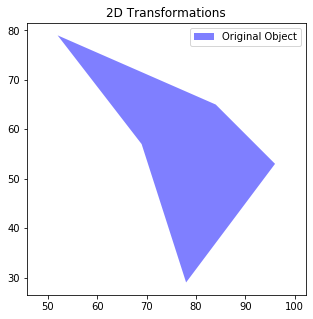



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 2
here
Enter translation factor along x-axis: 3
Enter translation factor along y-axis: 1


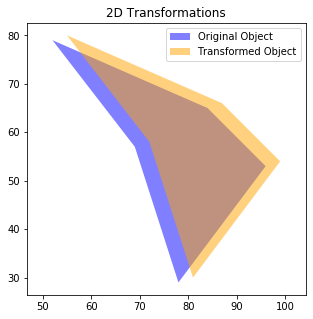



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 3
Enter scaling factor along x-axis: 2
Enter scaling factor along y-axis: 2


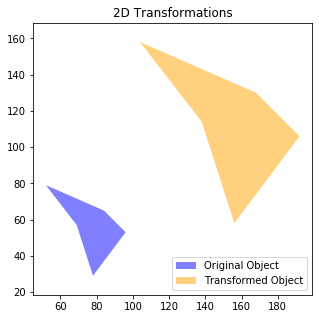



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 4
1.Clockwise
2.Anti-clockwise
Direction of rotation: 2
Enter degree of rotation: 90


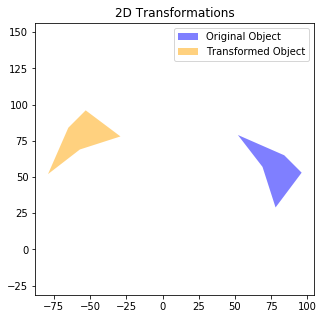



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 5
Let the equation of the line about which you want to reflect the object be 'y = mx + c'.
Enter values of m and c: 1000 0


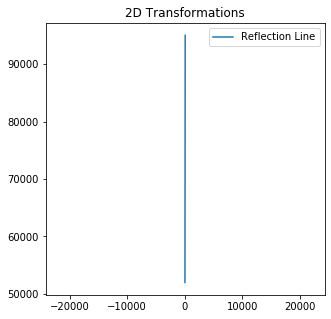

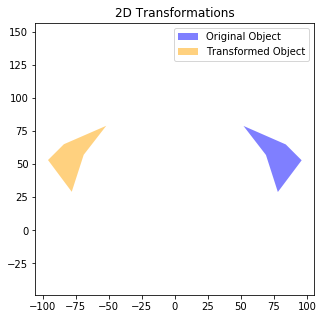



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 6
Enter shearing factor along x-axis: 2
Enter shearing factor along y-axis: 4


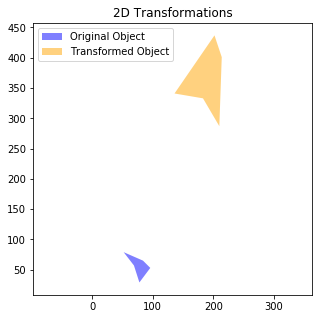



----------Menu----------
1.Create new Object
2.Translate Object
3.Scale Object
4.Rotate Object
5.Reflect Object
6.Shear Object
0.Exit
Enter your choice: 0


In [8]:
obj = None
while True:
    try:
        print("\n\n----------Menu----------")
        print("1.Create new Object")
        print("2.Translate Object")
        print("3.Scale Object")
        print("4.Rotate Object")
        print("5.Reflect Object")
        print("6.Shear Object")
        print("0.Exit")
        choice = input("Enter your choice: ")
        if choice == '0':
            break
        elif choice == '1':
            obj = getNewObj()
            print("Coordinates of the object")
            print("\n".join(list(map(str, list(zip(obj[:, 0], obj[:, 1]))))))
            show(obj)
        elif choice == '2':
            print('here')
            newObj = translation(obj)
            show(obj, newObj)
        elif choice == '3':
            newObj = scaling(obj)
            show(obj, newObj)
        elif choice == '4':
            newObj = rotation(obj)
            show(obj, newObj)
        elif choice == '5':
            newObj = reflection(obj)
            show(obj, newObj)
        elif choice == '6':
            newObj = shearing(obj)
            show(obj, newObj)
        else:
            print("Enter a valid choice!!")

    except Exception as e:
        print(e)